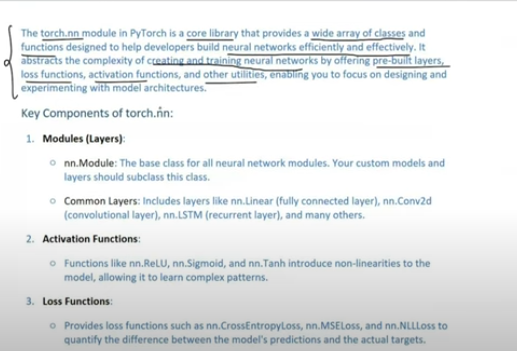

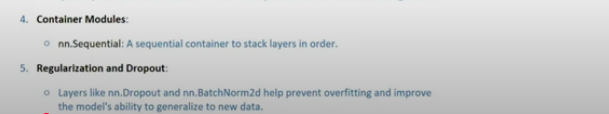

In [2]:
import torch
import torch.nn as  nn

In [3]:
class Model(nn.Module):
  # this will be the model
  def __init__(self,num_features):
    super().__init__()
    self.linear1 = nn.Linear(num_features,3)
    self.relu = nn.ReLU()

    self.linear2 = nn.Linear(3,1)
    self.sigmoid = nn.Sigmoid()


  def forward(self , features):
    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)

    return out


In [4]:
features = torch.rand(10,5)
model =Model(features.shape[1])
model(features) # you can also do model.forward(features)

tensor([[0.4566],
        [0.4760],
        [0.4689],
        [0.4485],
        [0.4898],
        [0.4657],
        [0.4726],
        [0.4264],
        [0.4852],
        [0.4576]], grad_fn=<SigmoidBackward0>)

In [5]:
# ## show model weights
print(model.linear1.bias)
print(model.linear1.weight)


Parameter containing:
tensor([ 0.4404, -0.0353, -0.1238], requires_grad=True)
Parameter containing:
tensor([[-0.0943,  0.4073,  0.3679, -0.0487, -0.0920],
        [ 0.1620,  0.3874,  0.3255, -0.2376,  0.2888],
        [ 0.0208,  0.2236,  0.1154,  0.1474,  0.4216]], requires_grad=True)


In [6]:
!pip install torchinfo

In [7]:
 from torchinfo import summary

 summary(model, input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## You can make the model using following

In [8]:
 class Model1(nn.Module):
  # this will be the model
  def __init__(self,num_features):
    super().__init__()
    self.network = nn.Sequential(

        nn.Linear(num_features,3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )


  def forward(self , features):
    out = self.network(features)

    return out


## Optim module in pytorch


In [40]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)
X_train_tensor = X_train_tensor.float()
y_train_tensor = y_train_tensor.float()

In [47]:
class MySimpleNN(nn.Module):
  def __init__(self,X):
    super().__init__()
    self.linear = nn.Linear(X.shape[1],1)
    self.sigmoid = nn.Sigmoid()


  def forward(self,X):
    out = self.linear(X)
    out = self.sigmoid(out)
    return out




In [48]:
learning_rate = 0.01
epochs = 100
X_test_tensor

tensor([[ 0.9267, -0.4930,  0.8909,  ...,  1.1048,  0.3693, -0.1687],
        [-0.9723,  1.4143, -0.9735,  ..., -0.8017,  0.7951, -0.1505],
        [-0.5868,  2.1196, -0.6105,  ..., -0.6515, -0.7164, -0.1253],
        ...,
        [ 0.5755,  0.1092,  0.5221,  ...,  0.5880, -0.3975, -1.0936],
        [ 0.6412, -0.8163,  0.5470,  ...,  0.3381, -0.9474, -0.6419],
        [ 0.8554, -0.0243,  0.9075,  ...,  2.1566,  0.3237,  0.3392]],
       dtype=torch.float64)

In [49]:
# X_train_tensor = torch.tensor(X_train_tensor,dtype=torch.double)
model.parameters()

<generator object Module.parameters at 0x7b57622bf4c0>

In [53]:
model = MySimpleNN(X_train_tensor)
loss_function = nn.BCELoss()
y_train_tensor = y_train_tensor.float().view(-1, 1)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(epochs):
    # Forward pass
    y_pred = model(X_train_tensor)

    # Loss computation
    loss = loss_function(y_pred, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {i+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.7408
Epoch 2, Loss: 0.7177
Epoch 3, Loss: 0.6960
Epoch 4, Loss: 0.6756
Epoch 5, Loss: 0.6564
Epoch 6, Loss: 0.6383
Epoch 7, Loss: 0.6214
Epoch 8, Loss: 0.6055
Epoch 9, Loss: 0.5905
Epoch 10, Loss: 0.5764
Epoch 11, Loss: 0.5631
Epoch 12, Loss: 0.5506
Epoch 13, Loss: 0.5388
Epoch 14, Loss: 0.5276
Epoch 15, Loss: 0.5170
Epoch 16, Loss: 0.5070
Epoch 17, Loss: 0.4975
Epoch 18, Loss: 0.4885
Epoch 19, Loss: 0.4800
Epoch 20, Loss: 0.4718
Epoch 21, Loss: 0.4640
Epoch 22, Loss: 0.4566
Epoch 23, Loss: 0.4496
Epoch 24, Loss: 0.4428
Epoch 25, Loss: 0.4363
Epoch 26, Loss: 0.4301
Epoch 27, Loss: 0.4242
Epoch 28, Loss: 0.4185
Epoch 29, Loss: 0.4130
Epoch 30, Loss: 0.4077
Epoch 31, Loss: 0.4026
Epoch 32, Loss: 0.3978
Epoch 33, Loss: 0.3931
Epoch 34, Loss: 0.3885
Epoch 35, Loss: 0.3841
Epoch 36, Loss: 0.3799
Epoch 37, Loss: 0.3758
Epoch 38, Loss: 0.3719
Epoch 39, Loss: 0.3680
Epoch 40, Loss: 0.3643
Epoch 41, Loss: 0.3607
Epoch 42, Loss: 0.3572
Epoch 43, Loss: 0.3539
Epoch 44, Loss: 0.35